In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gens = pd.read_csv("gens.csv")
incentive = pd.read_csv("incentive.csv")
pred = pd.read_csv("pred.csv")
real_w = pd.read_csv("weather_actual.csv")
pred_w = pd.read_csv("weather_forecast.csv")

# gens.csv

In [3]:
gens.head()

,time,amount
0,2022-06-19 01:00:00+09:00,0.0
1,2022-06-19 02:00:00+09:00,0.0
2,2022-06-19 03:00:00+09:00,0.0
3,2022-06-19 04:00:00+09:00,0.0
4,2022-06-19 05:00:00+09:00,0.0


In [5]:
# 10월 15일 24시까지 데이터
gens.tail()

,time,amount
11611,2023-10-15 20:00:00+09:00,0.0
11612,2023-10-15 21:00:00+09:00,0.0
11613,2023-10-15 22:00:00+09:00,0.0
11614,2023-10-15 23:00:00+09:00,0.0
11615,2023-10-16 00:00:00+09:00,0.0


In [4]:
gens.describe()

,amount
count,11616.000000
mean,17.403086
std,25.623935
min,0.000000
25%,0.000000
50%,1.000000
75%,30.000000
max,104.000000


<Axes: >

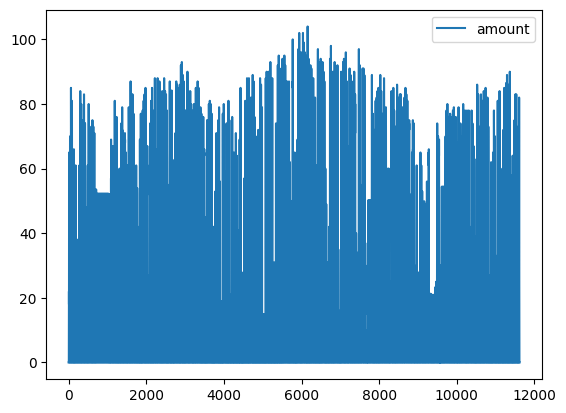

In [6]:
gens.plot()

<Axes: >

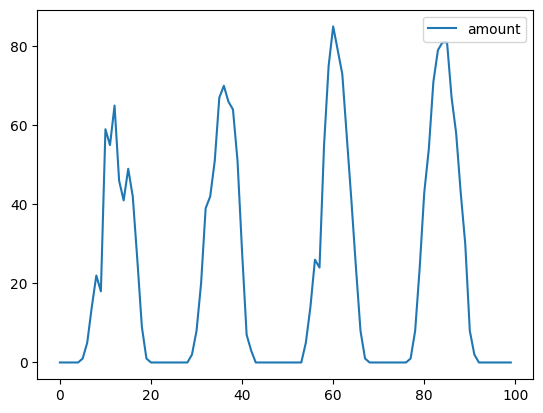

In [7]:
gens.iloc[:100].plot()

# incentive.csv

In [8]:
incentive.head()

,time,model_id,incentive,is_utilizable
0,2022-06-19 01:00:00+09:00,0,0,0
1,2022-06-19 01:00:00+09:00,1,0,0
2,2022-06-19 01:00:00+09:00,2,0,0
3,2022-06-19 01:00:00+09:00,3,0,0
4,2022-06-19 01:00:00+09:00,4,0,0


In [9]:
# 10월 15일 24시까지
incentive.tail()

,time,model_id,incentive,is_utilizable
57955,2023-10-16 00:00:00+09:00,0,0,0
57956,2023-10-16 00:00:00+09:00,1,0,0
57957,2023-10-16 00:00:00+09:00,2,0,0
57958,2023-10-16 00:00:00+09:00,3,0,0
57959,2023-10-16 00:00:00+09:00,4,0,0


In [10]:
incentive['model_id'].value_counts()

model_id
0    11592
1    11592
2    11592
3    11592
4    11592
Name: count, dtype: int64

In [14]:
incentive.groupby('model_id',as_index=False).sum()

,model_id,time,incentive,is_utilizable
0,0,2022-06-19 01:00:00+09:002022-06-19 02:00:00+0...,328943,4424
1,1,2022-06-19 01:00:00+09:002022-06-19 02:00:00+0...,339483,4424
2,2,2022-06-19 01:00:00+09:002022-06-19 02:00:00+0...,307260,4424
3,3,2022-06-19 01:00:00+09:002022-06-19 02:00:00+0...,334976,4424
4,4,2022-06-19 01:00:00+09:002022-06-19 02:00:00+0...,241944,4424


<Axes: >

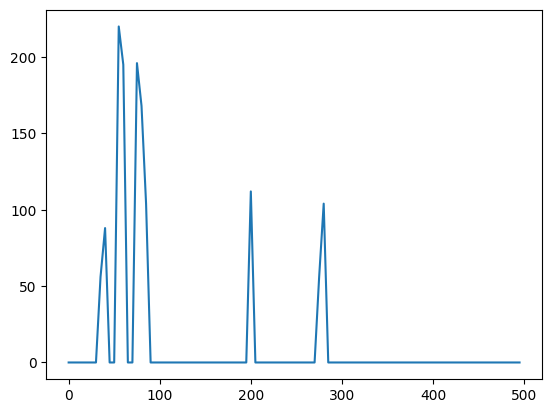

In [19]:
incentive[incentive['model_id']==0]['incentive'].iloc[:100].plot()

In [31]:
incentive[incentive['model_id']==0][incentive['is_utilizable']==0]['incentive'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\440145272.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incentive[incentive['model_id']==0][incentive['is_utilizable']==0]['incentive'].mean()


0.0

In [30]:
incentive[incentive['model_id']==0][incentive['is_utilizable']==1]['incentive'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2333881379.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incentive[incentive['model_id']==0][incentive['is_utilizable']==1]['incentive'].mean()


74.35420433996383

<Axes: >

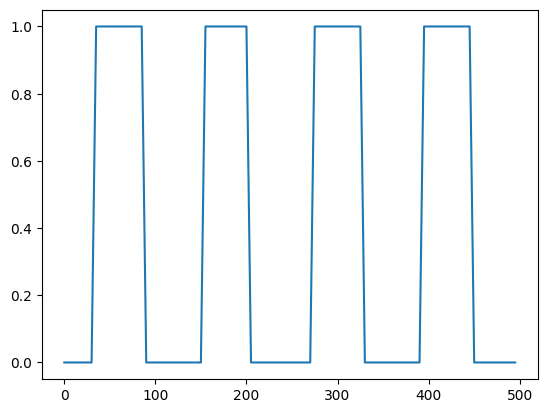

In [20]:
incentive[incentive['model_id']==0]['is_utilizable'].iloc[:100].plot()

<Axes: >

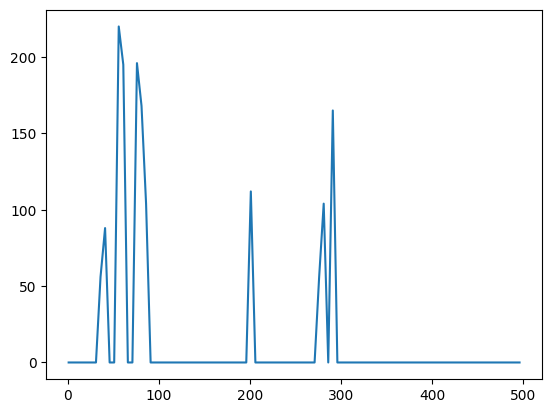

In [25]:
incentive[incentive['model_id']==1]['incentive'].iloc[:100].plot()

<Axes: >

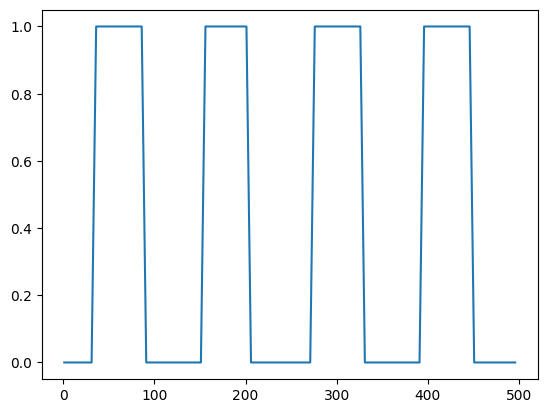

In [24]:
incentive[incentive['model_id']==1]['is_utilizable'].iloc[:100].plot()

# pred.csv

In [32]:
pred.head()

,round,time,model_id,amount
0,1,2022-06-19 01:00:00+09:00,0,0.0
1,1,2022-06-19 01:00:00+09:00,1,0.0
2,1,2022-06-19 01:00:00+09:00,2,0.0
3,1,2022-06-19 01:00:00+09:00,3,0.0
4,1,2022-06-19 01:00:00+09:00,4,0.0


In [33]:
# 10월 15일 24시까지
pred.tail()

,round,time,model_id,amount
116035,2,2023-10-16 00:00:00+09:00,0,0.0
116036,2,2023-10-16 00:00:00+09:00,1,0.0
116037,2,2023-10-16 00:00:00+09:00,2,0.0
116038,2,2023-10-16 00:00:00+09:00,3,0.0
116039,2,2023-10-16 00:00:00+09:00,4,0.0


In [34]:
pred['round'].value_counts()

round
1    58080
2    57960
Name: count, dtype: int64

In [36]:
pred[pred['round']==1].tail()

,round,time,model_id,amount
58075,1,2023-10-16 00:00:00+09:00,0,0.0
58076,1,2023-10-16 00:00:00+09:00,1,0.0
58077,1,2023-10-16 00:00:00+09:00,2,0.0
58078,1,2023-10-16 00:00:00+09:00,3,0.0
58079,1,2023-10-16 00:00:00+09:00,4,0.0


In [35]:
pred[pred['round']==2].head()

,round,time,model_id,amount
58080,2,2022-06-19 01:00:00+09:00,0,0.0
58081,2,2022-06-19 01:00:00+09:00,1,0.0
58082,2,2022-06-19 01:00:00+09:00,2,0.0
58083,2,2022-06-19 01:00:00+09:00,3,0.0
58084,2,2022-06-19 01:00:00+09:00,4,0.0


In [75]:
# round 1에만 존재하는 시간대 : round 2에는 8월 17일 00시 ~ 8월 17일 24시 데이터가 누락됨
set(list(pred[pred['round']==1]['time'])) - set(list(pred[pred['round']==2]['time']))

{'2023-08-17 01:00:00+09:00',
 '2023-08-17 02:00:00+09:00',
 '2023-08-17 03:00:00+09:00',
 '2023-08-17 04:00:00+09:00',
 '2023-08-17 05:00:00+09:00',
 '2023-08-17 06:00:00+09:00',
 '2023-08-17 07:00:00+09:00',
 '2023-08-17 08:00:00+09:00',
 '2023-08-17 09:00:00+09:00',
 '2023-08-17 10:00:00+09:00',
 '2023-08-17 11:00:00+09:00',
 '2023-08-17 12:00:00+09:00',
 '2023-08-17 13:00:00+09:00',
 '2023-08-17 14:00:00+09:00',
 '2023-08-17 15:00:00+09:00',
 '2023-08-17 16:00:00+09:00',
 '2023-08-17 17:00:00+09:00',
 '2023-08-17 18:00:00+09:00',
 '2023-08-17 19:00:00+09:00',
 '2023-08-17 20:00:00+09:00',
 '2023-08-17 21:00:00+09:00',
 '2023-08-17 22:00:00+09:00',
 '2023-08-17 23:00:00+09:00',
 '2023-08-18 00:00:00+09:00'}

In [76]:
len(pred[pred['round']==1][pred['model_id']==0]) - len(pred[pred['round']==2][pred['model_id']==0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\4208417331.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pred[pred['round']==1][pred['model_id']==0]) - len(pred[pred['round']==2][pred['model_id']==0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\4208417331.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pred[pred['round']==1][pred['model_id']==0]) - len(pred[pred['round']==2][pred['model_id']==0])


24

In [39]:
# round 2는 round 1에 전부 포함됨 (round 2에는 모델 결과값 없는 시간대 존재!)
set(list(pred[pred['round']==2]['time'])) - set(list(pred[pred['round']==1]['time']))

set()

In [40]:
pred['model_id'].value_counts()

model_id
0    23208
1    23208
2    23208
3    23208
4    23208
Name: count, dtype: int64

<Axes: >

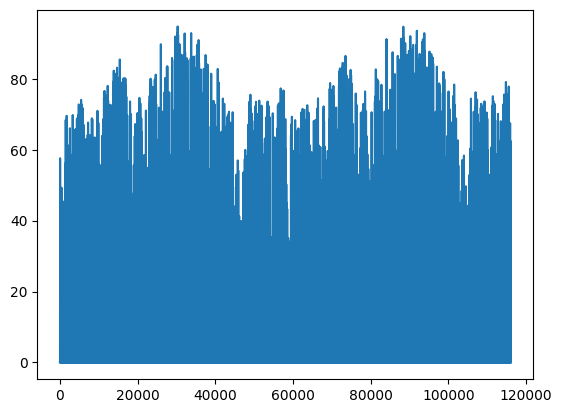

In [41]:
pred[pred['model_id']==0]['amount'].plot()

<Axes: >

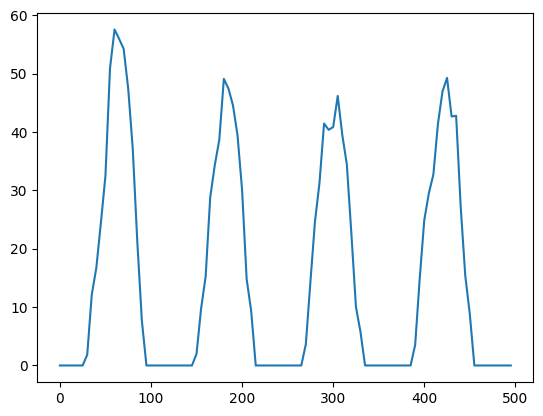

In [42]:
pred[pred['model_id']==0]['amount'].iloc[:100].plot()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\653404341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\653404341.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='b')


<Axes: >

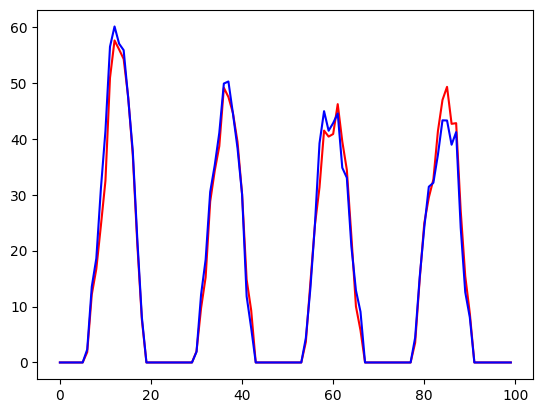

In [44]:
# model_id 0의 round 1 vs round 2
pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='r')
pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='b')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3243052021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3243052021.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='b')


<Axes: >

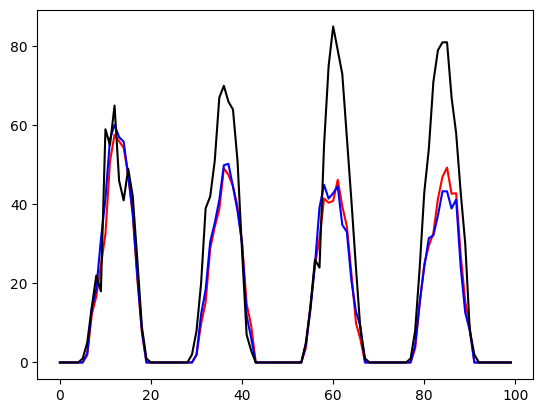

In [49]:
# gen vs model_id 0 round 1 vs model_id 0 round 2
pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='r')
pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='b')
gens['amount'].iloc[:100].reset_index(drop=True).plot(c='black')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3033189632.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#ff0000')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3033189632.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#880000')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3033189632.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#00ff00')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3033189632.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred[pred['model_id']==1][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#0

<Axes: >

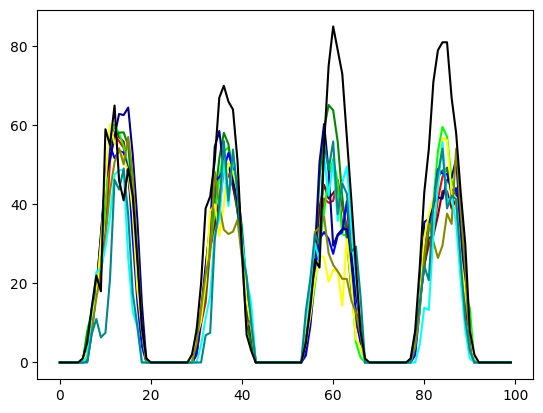

In [53]:
# gen 검 vs model_id 0 빨 vs model_id 1 초 vs model_id 2 파 vs model_id 3 주 vs model_id 4 청록
pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#ff0000')
pred[pred['model_id']==0][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#880000')
pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#00ff00')
pred[pred['model_id']==1][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#008800')
pred[pred['model_id']==2][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#0000ff')
pred[pred['model_id']==2][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#000088')
pred[pred['model_id']==3][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#ffff00')
pred[pred['model_id']==3][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#888800')
pred[pred['model_id']==4][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True).plot(c='#00ffff')
pred[pred['model_id']==4][pred['round']==2]['amount'].iloc[:100].reset_index(drop=True).plot(c='#008888')


gens['amount'].iloc[:100].reset_index(drop=True).plot(c='black')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3192664329.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ff0000')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3192664329.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ff00')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3192664329.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pred[pred['model_id']==2][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#0000ff')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\3192664329.py:5: UserWarning: Boolean Se

<Axes: >

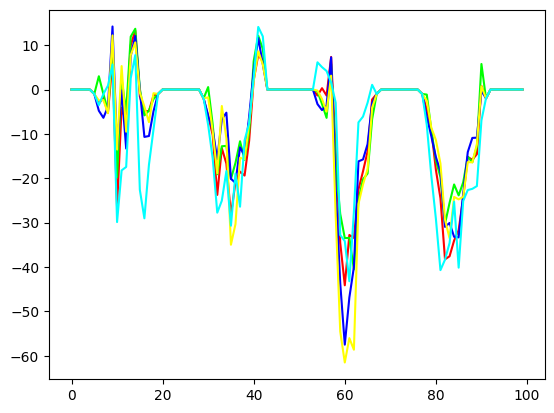

In [55]:
# y_pred - y_true : model_id 0 빨 vs model_id 1 초 vs model_id 2 파 vs model_id 3 주 vs model_id 4 청록
(pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ff0000')
(pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ff00')
(pred[pred['model_id']==2][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#0000ff')
(pred[pred['model_id']==3][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ffff00')
(pred[pred['model_id']==4][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ffff')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2443320516.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  abs(pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ff0000')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2443320516.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  abs(pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ff00')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2443320516.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  abs(pred[pred['model_id']==2][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#0000ff')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2443320516.py:5: UserWarning: B

<Axes: >

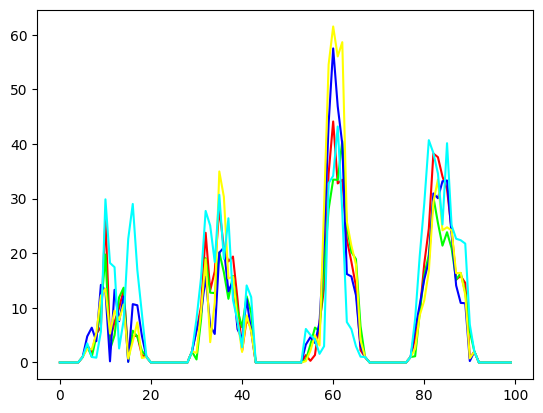

In [66]:
# |y_pred - y_true| : model_id 0 빨 vs model_id 1 초 vs model_id 2 파 vs model_id 3 주 vs model_id 4 청록
abs(pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ff0000')
abs(pred[pred['model_id']==1][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ff00')
abs(pred[pred['model_id']==2][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#0000ff')
abs(pred[pred['model_id']==3][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#ffff00')
abs(pred[pred['model_id']==4][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True)).plot(c='#00ffff')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\4125724039.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (abs(pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True))).plot(c='#ff0000')


<Axes: >

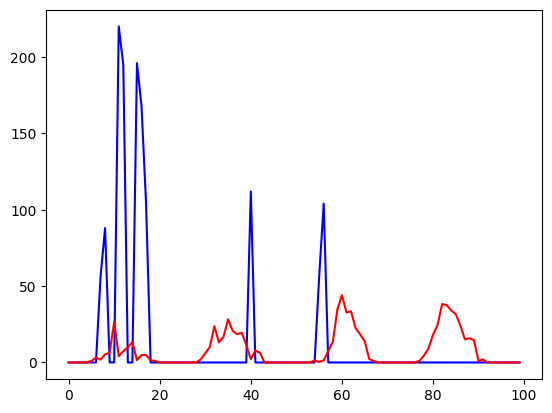

In [65]:
# model_id 0의 incentive 파 vs 오차 절댓값 빨
incentive[incentive['model_id']==0]['incentive'].reset_index(drop=True).iloc[:100].plot(c='#0000ff')
(abs(pred[pred['model_id']==0][pred['round']==1]['amount'].iloc[:100].reset_index(drop=True)-gens['amount'].iloc[:100].reset_index(drop=True))).plot(c='#ff0000')

# weather_actual.csv vs weather_forecast.csv

In [68]:
real_w.head()

,time,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation
0,2022-06-19 01:00:00+09:00,5.871524,23.030000,91.128476,1009.000000,2.394132,152.173538,0.0,0.0,20.193333,19.193333,0.0,6.704280,-31.529640
1,2022-06-19 02:00:00+09:00,5.000000,20.046829,92.000000,1009.000000,2.490000,133.000000,0.0,0.0,20.010169,16.100000,0.0,22.196370,-28.440428
2,2022-06-19 03:00:00+09:00,31.668514,20.275571,92.000000,1008.012749,2.340765,139.974501,0.0,0.0,20.304918,16.257377,0.0,35.919394,-22.437437
3,2022-06-19 04:00:00+09:00,100.000000,20.380388,93.000000,1008.000000,2.770000,142.000000,0.0,0.0,20.403077,19.004615,0.0,47.557714,-14.221450
4,2022-06-19 05:00:00+09:00,100.000000,22.030000,93.000000,1008.000000,2.557647,133.882353,0.0,0.0,20.495385,10.143077,0.0,57.378183,-4.444699


In [81]:
# 10월 15일 24시까지
real_w.tail()

,time,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation
11611,2023-10-15 20:00:00+09:00,0.0,18.807459,70.000000,1014.0,6.320000,307.000000,0.0,0.0,13.204762,16.10000,0.0,277.464745,-25.379191
11612,2023-10-15 21:00:00+09:00,0.0,17.918518,67.888518,1015.0,5.553144,306.554073,0.0,0.0,13.300000,16.10000,0.0,287.678638,-37.409688
11613,2023-10-15 22:00:00+09:00,0.0,17.030000,67.000000,1015.0,5.100000,303.000000,0.0,0.0,13.055738,20.34918,0.0,301.007172,-48.655175
11614,2023-10-15 23:00:00+09:00,0.0,18.730542,67.000000,1015.0,5.190000,297.000000,0.0,0.0,12.183333,9.59000,0.0,320.433966,-58.056463
11615,2023-10-16 00:00:00+09:00,0.0,14.030000,66.000000,1015.0,5.360000,293.000000,0.0,0.0,11.700000,6.40000,0.0,349.065111,-63.421759


<Axes: >

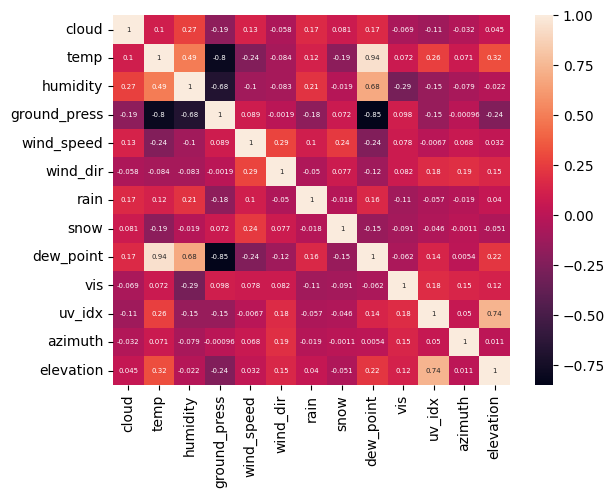

In [101]:
corr_w = real_w[['cloud','temp','humidity','ground_press','wind_speed','wind_dir','rain','snow','dew_point','vis','uv_idx','azimuth','elevation']].corr()
sns.heatmap(corr_w, annot=True, annot_kws={"size":5})

<Axes: >

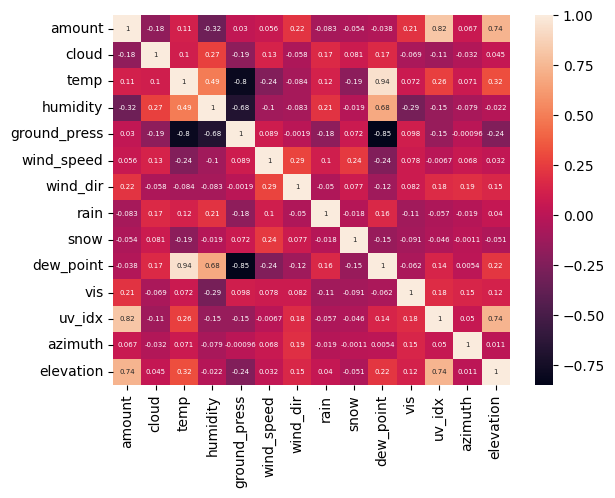

In [111]:
# real_amount <- uv_idx, elevation이 가장 큰 영향!
total_w = pd.concat([real_w,gens['amount']],axis=1)
corr_w = total_w[['amount','cloud','temp','humidity','ground_press','wind_speed','wind_dir','rain','snow','dew_point','vis','uv_idx','azimuth','elevation']].corr()
sns.heatmap(corr_w, annot=True, annot_kws={"size":5})

<Axes: >

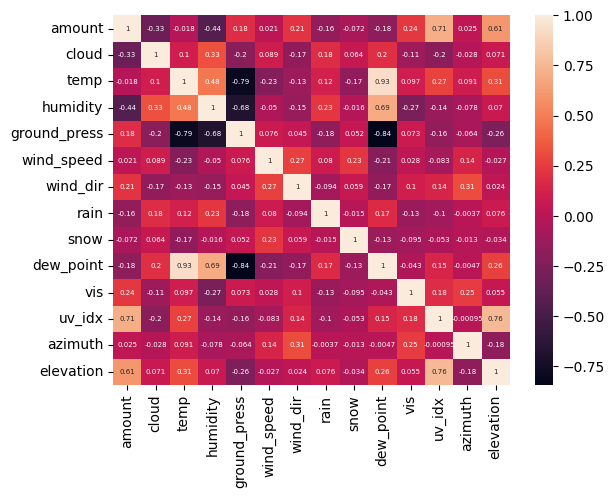

In [110]:
# real_amount가 0이 아닐때!
# real_amount <- uv_idx, elevation이 가장 큰 영향!
total_w = pd.concat([real_w,gens['amount']],axis=1)
total_w = total_w[total_w['amount']!=0]
corr_w = total_w[['amount','cloud','temp','humidity','ground_press','wind_speed','wind_dir','rain','snow','dew_point','vis','uv_idx','azimuth','elevation']].corr()
sns.heatmap(corr_w, annot=True, annot_kws={"size":5})

################## model_id : 0 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1875392978.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


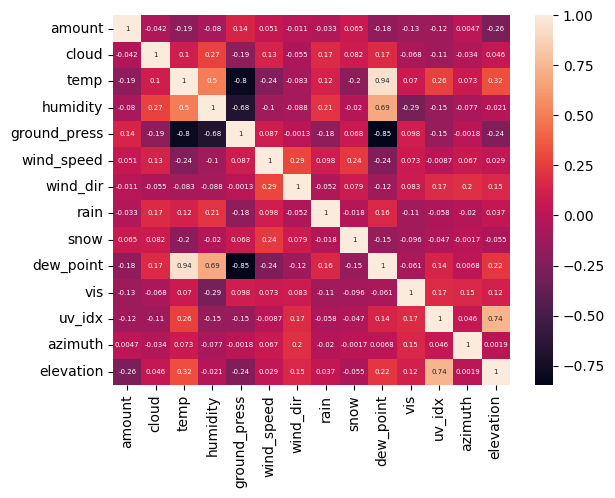

################## model_id : 1 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1875392978.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


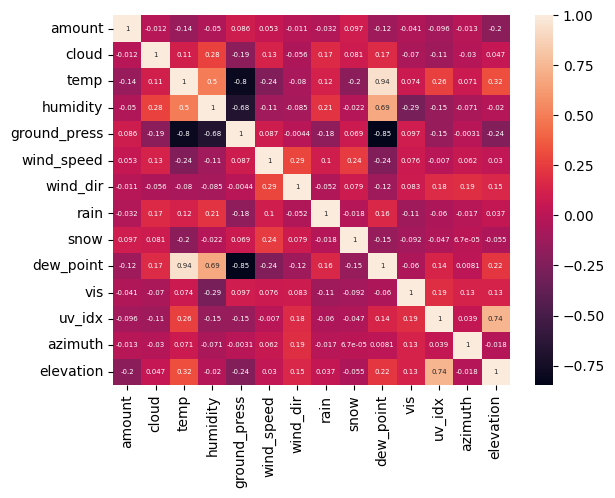

################## model_id : 2 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1875392978.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


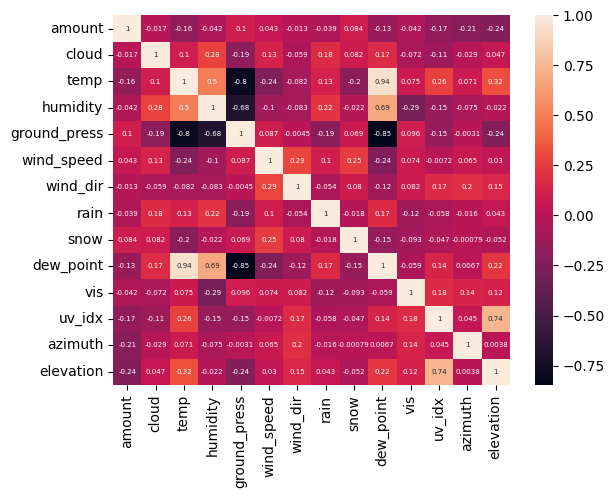

################## model_id : 3 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1875392978.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


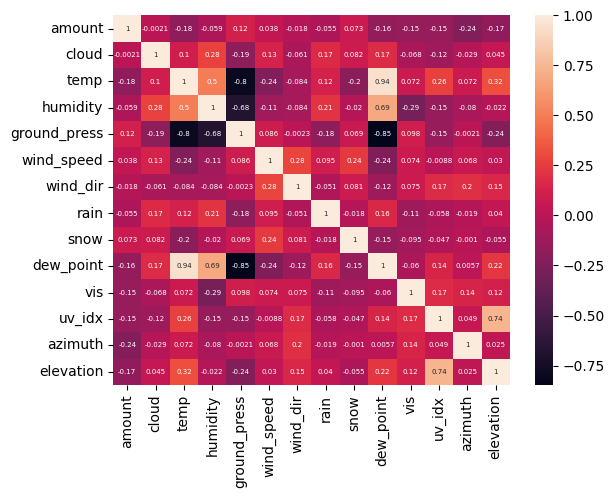

################## model_id : 4 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1875392978.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


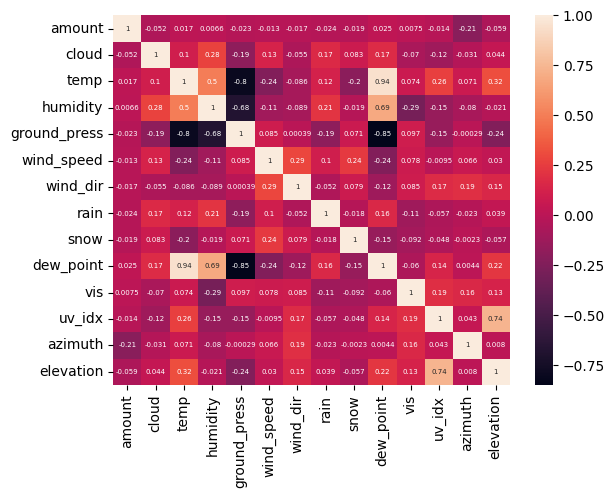

In [116]:
# model_amount ???? 뭘 보고 예측하는 거죠??? 어이가 없네...
for i in range(5):
    print(f"################## model_id : {i} ####################################")
    plt.figure()
    total_w = pd.concat([real_w,pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)
    total_w = total_w[total_w['amount']!=0]
    corr_w = total_w[['amount','cloud','temp','humidity','ground_press','wind_speed','wind_dir','rain','snow','dew_point','vis','uv_idx','azimuth','elevation']].corr()
    sns.heatmap(corr_w, annot=True, annot_kws={"size":5})
    plt.show()

################## model_id : 0 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\251860926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


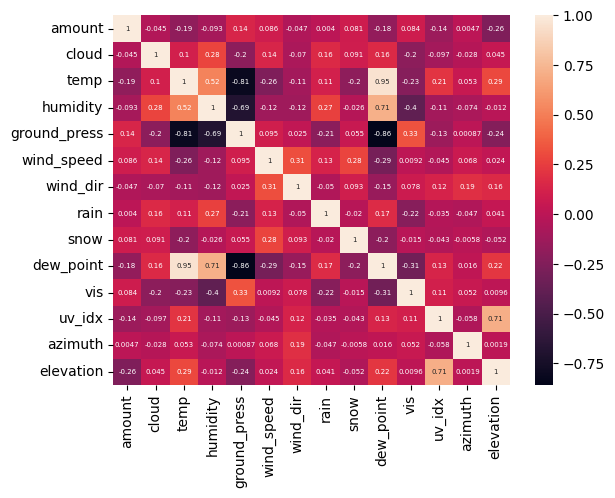

################## model_id : 1 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\251860926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


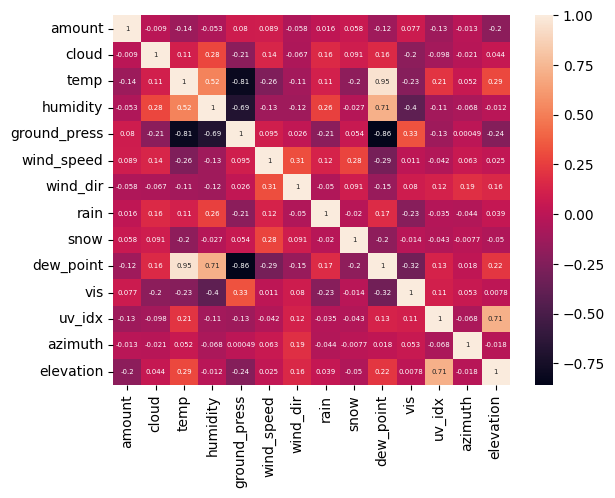

################## model_id : 2 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\251860926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


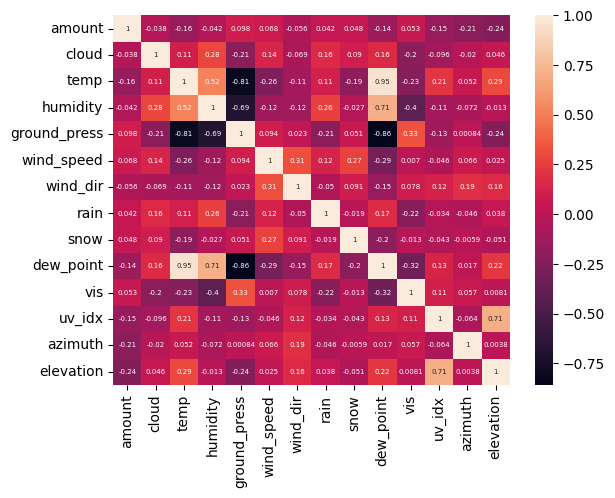

################## model_id : 3 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\251860926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


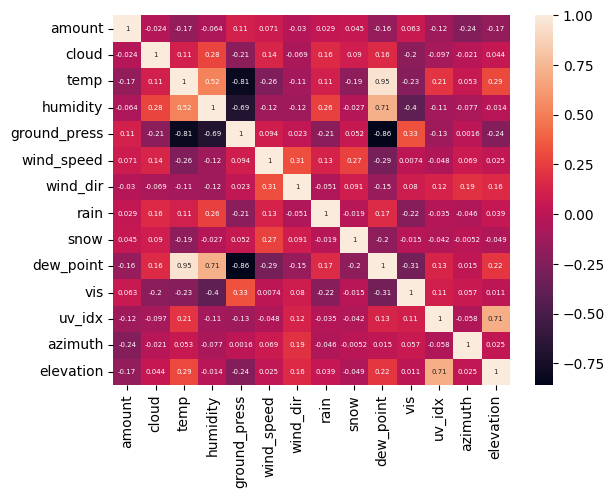

################## model_id : 4 ####################################


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\251860926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)


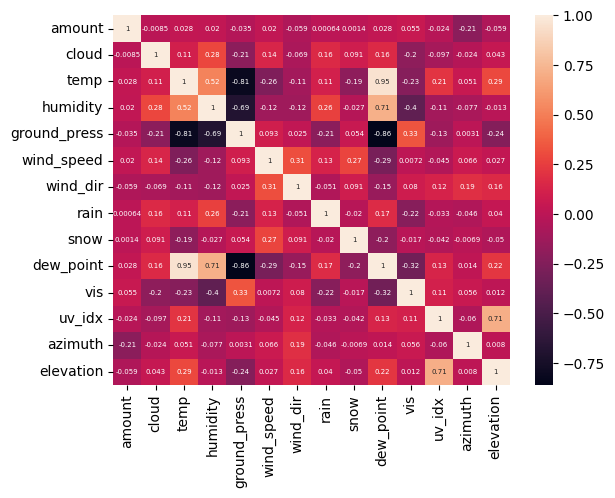

In [142]:
# model_amount ???? 뭘 보고 예측하는 거죠??? 어이가 없네...
for i in range(5):
    print(f"################## model_id : {i} ####################################")
    plt.figure()
    total_w = pd.concat([pred_w[pred_w['round']==1],pred[pred['model_id']==i][pred['round']==1]['amount']],axis=1)
    total_w = total_w[total_w['amount']!=0]
    corr_w = total_w[['amount','cloud','temp','humidity','ground_press','wind_speed','wind_dir','rain','snow','dew_point','vis','uv_idx','azimuth','elevation']].corr()
    sns.heatmap(corr_w, annot=True, annot_kws={"size":5})
    plt.show()

In [69]:
pred_w.head()

,round,time,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation
0,1,2022-06-19 01:00:00+09:00,6.0,20.03,93.0,1009.0,3.01,162.0,0.0,0.0,18.3333,16.0934,0.0,6.70428,-31.5296
1,1,2022-06-19 02:00:00+09:00,7.0,19.88,95.0,1009.0,3.16,159.0,0.0,0.0,18.3333,16.0934,0.0,22.19640,-28.4404
2,1,2022-06-19 03:00:00+09:00,17.0,19.99,96.0,1008.0,2.92,161.0,0.0,0.0,18.3333,16.0934,0.0,35.91940,-22.4374
3,1,2022-06-19 04:00:00+09:00,100.0,20.19,96.0,1008.0,2.79,157.0,0.0,0.0,17.7778,16.0934,0.0,47.55770,-14.2214
4,1,2022-06-19 05:00:00+09:00,100.0,20.34,95.0,1008.0,2.74,156.0,0.0,0.0,18.3333,16.0934,0.0,57.37820,-4.4447


In [85]:
# 10월 15일 24시까지
pred_w.tail()

,round,time,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation
23187,2,2023-10-15 20:00:00+09:00,0.0,18.51,69.0,1015.0,5.56,328.0,0.0,0.0,12.7778,16.0934,0.0,277.465,-25.3792
23188,2,2023-10-15 21:00:00+09:00,0.0,18.59,70.0,1015.0,5.25,317.0,0.0,0.0,12.7778,16.0934,0.0,287.679,-37.4097
23189,2,2023-10-15 22:00:00+09:00,0.0,18.68,69.0,1015.0,5.58,310.0,0.0,0.0,12.7778,16.0934,0.0,301.007,-48.6552
23190,2,2023-10-15 23:00:00+09:00,0.0,18.77,66.0,1015.0,5.75,306.0,0.0,0.0,12.2222,16.0934,0.0,320.434,-58.0565
23191,2,2023-10-16 00:00:00+09:00,0.0,18.71,66.0,1015.0,5.85,306.0,0.0,0.0,12.2222,16.0934,0.0,349.065,-63.4218


In [92]:
pred_w['uv_idx'].value_counts()

uv_idx
0.0     13564
1.0      3516
2.0      2212
3.0      1408
4.0       792
5.0       571
7.0       262
6.0       225
8.0       219
11.0      147
10.0      143
9.0       133
Name: count, dtype: int64

In [71]:
pred_w['round'].value_counts()

round
1    11616
2    11576
Name: count, dtype: int64

In [79]:
# ??? 24개보다 많네?
pred_w['round'].value_counts().iloc[0]-pred_w['round'].value_counts().iloc[1]

40

In [72]:
# 8월 17일 16시간(이건 ok) + 10월 10일 24시간(애는 결국 고려해야함...)이 결측치임...
set(list(pred_w[pred_w['round']==1]['time'])) - set(list(pred_w[pred_w['round']==2]['time']))

{'2023-08-17 01:00:00+09:00',
 '2023-08-17 02:00:00+09:00',
 '2023-08-17 03:00:00+09:00',
 '2023-08-17 04:00:00+09:00',
 '2023-08-17 05:00:00+09:00',
 '2023-08-17 06:00:00+09:00',
 '2023-08-17 07:00:00+09:00',
 '2023-08-17 08:00:00+09:00',
 '2023-08-17 09:00:00+09:00',
 '2023-08-17 10:00:00+09:00',
 '2023-08-17 11:00:00+09:00',
 '2023-08-17 12:00:00+09:00',
 '2023-08-17 13:00:00+09:00',
 '2023-08-17 14:00:00+09:00',
 '2023-08-17 15:00:00+09:00',
 '2023-08-17 16:00:00+09:00',
 '2023-10-10 01:00:00+09:00',
 '2023-10-10 02:00:00+09:00',
 '2023-10-10 03:00:00+09:00',
 '2023-10-10 04:00:00+09:00',
 '2023-10-10 05:00:00+09:00',
 '2023-10-10 06:00:00+09:00',
 '2023-10-10 07:00:00+09:00',
 '2023-10-10 08:00:00+09:00',
 '2023-10-10 09:00:00+09:00',
 '2023-10-10 10:00:00+09:00',
 '2023-10-10 11:00:00+09:00',
 '2023-10-10 12:00:00+09:00',
 '2023-10-10 13:00:00+09:00',
 '2023-10-10 14:00:00+09:00',
 '2023-10-10 15:00:00+09:00',
 '2023-10-10 16:00:00+09:00',
 '2023-10-10 17:00:00+09:00',
 '2023-10-

# weather_actual.csv x weather_forecast.csv x gens.csv x pred.csv

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1065729689.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mm_pred_error0 = pd.DataFrame(mm_pred0.fit_transform(abs(pred[pred['model_id']==0][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\1065729689.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mm_pred_error1 = pd.DataFrame(mm_pred1.fit_transform(abs(pred[pred['model_id']==1][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]


<Axes: >

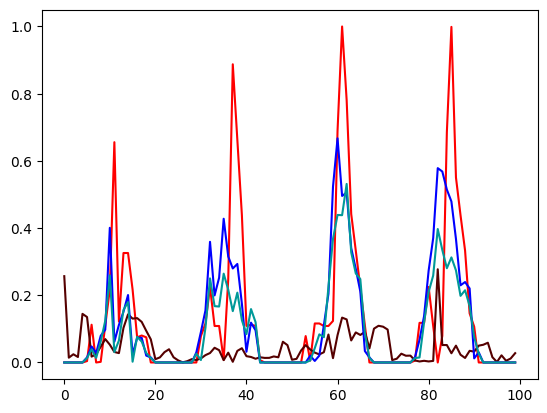

In [143]:
# uv_idx_pred_error 빨 vs temp_error 갈 vs model0_pred_error 파 vs model1_pred_error 청록
# 음... 잘 모르겠다...

from sklearn.preprocessing import MinMaxScaler
mm_uv_idx = MinMaxScaler()
mm_temp = MinMaxScaler()
mm_pred0 = MinMaxScaler()
mm_pred1 = MinMaxScaler()

df_uv_idx_error = pd.DataFrame(mm_uv_idx.fit_transform((abs(pred_w['uv_idx'] - real_w['uv_idx'])).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]
df_temp_error = pd.DataFrame(mm_temp.fit_transform((abs(pred_w['temp'] - real_w['temp'])).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]
df_mm_pred_error0 = pd.DataFrame(mm_pred0.fit_transform(abs(pred[pred['model_id']==0][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]
df_mm_pred_error1 = pd.DataFrame(mm_pred1.fit_transform(abs(pred[pred['model_id']==1][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)).to_numpy().reshape(-1,1))).reset_index(drop=True).iloc[:100]

df_uv_idx_error[0].plot(c='#ff0000')
df_temp_error[0].plot(c='#550000')
df_mm_pred_error0[0].plot(c='#0000ff')
df_mm_pred_error1[0].plot(c='#009999')


In [148]:
# temp_error vs uv_idx_error vs model0_error vs model1_error vs model2_error vs model3_error vs model4_error
# model0 ~ model3은 비슷한 친구들 같고, model4가 조금 많이 특이한 것 같음
error_df = pd.concat([abs(pred_w[pred_w['round']==1]['temp'].reset_index(drop=True)-real_w['temp'].reset_index(drop=True)), abs(pred_w[pred_w['round']==1]['uv_idx'].reset_index(drop=True)-real_w['uv_idx'].reset_index(drop=True)), abs(pred[pred['model_id']==0][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==1][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==2][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==3][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==4][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True))], axis=1)
error_df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\2501581294.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_df = pd.concat([abs(pred_w[pred_w['round']==1]['temp'].reset_index(drop=True)-real_w['temp'].reset_index(drop=True)), abs(pred_w[pred_w['round']==1]['uv_idx'].reset_index(drop=True)-real_w['uv_idx'].reset_index(drop=True)), abs(pred[pred['model_id']==0][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==1][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==2][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==3][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True)), abs(pred[pred['model_id']==4][pred['round']==1]['amount'].reset_index(drop=True)-gens['amount'].reset_index(drop=True))], axis=1)
C:\Users\L

,temp,uv_idx,amount,amount,amount,amount,amount
temp,1.000000,0.018205,0.016146,0.008082,0.014390,0.006714,0.011418
uv_idx,0.018205,1.000000,0.456940,0.445932,0.441412,0.438438,0.320398
amount,0.016146,0.456940,1.000000,0.919575,0.864477,0.865893,0.557948
amount,0.008082,0.445932,0.919575,1.000000,0.859146,0.883080,0.536027
amount,0.014390,0.441412,0.864477,0.859146,1.000000,0.853360,0.527119
amount,0.006714,0.438438,0.865893,0.883080,0.853360,1.000000,0.490644
amount,0.011418,0.320398,0.557948,0.536027,0.527119,0.490644,1.000000


In [162]:
# model0의 incentive와 error... ????????
pd.concat([incentive[incentive['model_id']==0]['incentive'].reset_index(drop=True),abs(pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_x'] - pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_y']).reset_index(drop=True)],axis=1).corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\508691459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.concat([incentive[incentive['model_id']==0]['incentive'].reset_index(drop=True),abs(pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_x'] - pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_y']).reset_index(drop=True)],axis=1).corr()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19056\508691459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.concat([incentive[incentive['model_id']==0]['incentive'].reset_index(drop=True),abs(pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_x'] - pd.merge(left = gens, right = pred[pred['model_id']==0][pred['round']==2], on='time')['amount_y']).reset_index(drop=True)],axis=1).corr()


,incentive,0
incentive,1.000000,-0.045429
0,-0.045429,1.000000
